<a href="https://colab.research.google.com/github/PranayNagrale/Multilingual_Cyberbullying_Detection/blob/main/Code%20Files%20and%20Models/CyberBullying.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing pandas library
import pandas as pd
#importing numpy library
import numpy as np

# Bengali dataset

In [ ]:
# getting bengali labelled dataset
df_bengali = pd.read_csv('/content/drive/MyDrive/hatespeech/Bengali hate speech .csv')

In [ ]:
# selecting 'sentence','hate' columns and creating new df from it
df_bengali = df_bengali[['sentence','hate']]

In [ ]:
#renaming the column
df_bengali.rename(columns = {'sentence':'text'}, inplace = True)

In [ ]:
df_bengali.head()

,text,hate
0,যত্তসব পাপন শালার ফাজলামী!!!!!,1
1,পাপন শালা রে রিমান্ডে নেওয়া দরকার,1
2,জিল্লুর রহমান স্যারের ছেলে এতো বড় জারজ হবে এটা...,1
3,শালা লুচ্চা দেখতে পাঠার মত দেখা যায়,1
4,তুই তো শালা গাজা খাইছচ।তুর মার হেডায় খেলবে সাকিব,1


In [ ]:
# checking for null values
df_bengali.isna().sum()

text    0
hate    0
dtype: int64

In [ ]:
bengali_dataset = df_bengali

In [ ]:
bengali_dataset.head()

,text,hate
0,যত্তসব পাপন শালার ফাজলামী!!!!!,1
1,পাপন শালা রে রিমান্ডে নেওয়া দরকার,1
2,জিল্লুর রহমান স্যারের ছেলে এতো বড় জারজ হবে এটা...,1
3,শালা লুচ্চা দেখতে পাঠার মত দেখা যায়,1
4,তুই তো শালা গাজা খাইছচ।তুর মার হেডায় খেলবে সাকিব,1


# English dataset

In [ ]:
# getting dataset of english language

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/hate sppech dataset/english dataset/IMSyPP_EN_YouTube_comments_evaluation_context.csv')
df1.head()

,Video_ID,Comment_ID,Text,Type,Target,Annotator
0,-CiiWU2AoaM,Ugw3h-Rft03GK0sQyoB4AaABAg,Yes that Land in Palestinian belongs to Israel...,0. appropriate,NaN,HA
1,-CiiWU2AoaM,Ugw3h-Rft03GK0sQyoB4AaABAg.98MssOlE_zD98YOv6q7jxC,-*-*-*- Well hello hello there shalom sister s...,0. appropriate,NaN,HA
2,-CiiWU2AoaM,UgwBM57YKA5vyyj9M4l4AaABAg,God bless Israel 🇮🇱🇮🇱🇮🇱🙏🇮🇱🇮🇱🇮🇱Please please d...,0. appropriate,NaN,HA
3,-CiiWU2AoaM,UgwBM57YKA5vyyj9M4l4AaABAg.98KkdKOOII998YNQ89zmLu,-*-*-*- That is for sure amen brother,0. appropriate,NaN,HA
4,-CiiWU2AoaM,UgwcIWd1Fw4UGiyHQZl4AaABAg,We need Soapy like we need another in the head...,0. appropriate,NaN,HA


In [ ]:
df_eng1 = df1[['Text','Type']]
df_eng1.columns = ['text','hate']

In [ ]:
df_eng1.hate.replace(['0. appropriate','2. offensive','1. inappropriate','3. violent'],[0,1,1,1],inplace = True)

<ipython-input-156-b91e8599e21a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eng1.hate.replace(['0. appropriate','2. offensive','1. inappropriate','3. violent'],[0,1,1,1],inplace = True)


In [ ]:
df_eng1.dropna(inplace = True)

<ipython-input-157-de423f87a8d4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eng1.dropna(inplace = True)


In [ ]:
df_eng1.hate.isna().sum()

0

In [ ]:
df_eng1.hate = df_eng1.hate.astype(int)

<ipython-input-159-cd12ff53ea89>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eng1.hate = df_eng1.hate.astype(int)


In [ ]:
df_eng1

,text,hate
0,Yes that Land in Palestinian belongs to Israel...,0
1,-*-*-*- Well hello hello there shalom sister s...,0
2,God bless Israel 🇮🇱🇮🇱🇮🇱🙏🇮🇱🇮🇱🇮🇱Please please d...,0
3,-*-*-*- That is for sure amen brother,0
4,We need Soapy like we need another in the head...,0
...,...,...
21513,pria ge and all friends ko good morning,0
21514,Tell us about DRCC (student credit card),0
21515,Of course ravindra jadeja is the finest field...,0
21516,Yes,0


In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/hate sppech dataset/english dataset/labeled_data.csv')
df2

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [ ]:
# class label for majority of CF users. 0 - hate speech 1 - offensive language 2 - neither

In [ ]:
df_eng2 = df2[['tweet','class']]

In [ ]:
df_eng2.columns = ['text','hate']

In [ ]:
df_eng2.hate.value_counts()

1    19190
2     4163
0     1430
Name: hate, dtype: int64

In [ ]:
df_eng2.hate.replace([0,1,2],[1,1,0],inplace= True)

<ipython-input-165-68aee87ea103>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eng2.hate.replace([0,1,2],[1,1,0],inplace= True)


In [ ]:
df_eng2.hate.value_counts()

1    20620
0     4163
Name: hate, dtype: int64

In [ ]:
# concatinating/mergingenglish datasets to form single dataset for english language

In [ ]:
english_dataset = pd.concat([df_eng1,df_eng2])

In [ ]:
english_dataset.hate.value_counts()

1    26451
0    18886
Name: hate, dtype: int64

In [ ]:
english_dataset.drop_duplicates(inplace = True)

In [ ]:
english_dataset.reset_index(drop = True, inplace = True)

In [ ]:
english_dataset

,text,hate
0,Yes that Land in Palestinian belongs to Israel...,0
1,-*-*-*- Well hello hello there shalom sister s...,0
2,God bless Israel 🇮🇱🇮🇱🇮🇱🙏🇮🇱🇮🇱🇮🇱Please please d...,0
3,-*-*-*- That is for sure amen brother,0
4,We need Soapy like we need another in the head...,0
...,...,...
36806,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,1
36807,"you've gone and broke the wrong heart baby, an...",0
36808,young buck wanna eat!!.. dat nigguh like I ain...,1
36809,youu got wild bitches tellin you lies,1


# Hindi dataset

In [ ]:
# importing hindi datasetet

In [ ]:
df_hindi = pd.read_csv('/content/drive/MyDrive/hate sppech dataset/hindi dataset/hasoc2019_hi_test_gold_2919.tsv', sep = '\t')

In [ ]:
df_hindi1 = df_hindi[['text','task_1']]

In [ ]:
df_hindi1.task_1.replace(['NOT','HOF'],[0,1],inplace = True)

<ipython-input-64-9a9e469d6456>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hindi1.task_1.replace(['NOT','HOF'],[0,1],inplace = True)


In [ ]:
df_hindi1.columns = ['text','hate']

In [ ]:
df_hindi1.head()

,text,hate
0,"वक्त, इन्सान और इंग्लैंड का मौसम आपको कभी भी ध...",0
1,#कांग्रेस के इस #कमीने की #करतूत को देखिए देश ...,1
2,पाकिस्तान को फेकना था फेका गया। जो हार कर भी द...,1
3,जो शब्द तूम आज किसी और औरत के लिए यूज कर रहे व...,0
4,नेता जी हम समाजवादी सिपाही हमेशा आपके साथ है आ...,0


In [ ]:
df_h2 = pd.read_csv('/content/drive/MyDrive/hate sppech dataset/hindi dataset/hindi_dataset.tsv', sep= '\t')

In [ ]:
df_hindi2 = df_h2[['text','task_1']]

In [ ]:
df_hindi2.task_1.replace(['NOT','HOF'],[0,1],inplace = True)

<ipython-input-69-6f7b430d460d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hindi2.task_1.replace(['NOT','HOF'],[0,1],inplace = True)


In [ ]:
df_hindi2.columns = ['text','hate']

In [ ]:
df_hindi2.head()

,text,hate
0,"बांग्लादेश की शानदार वापसी, भारत को 314 रन पर ...",0
1,सब रंडी नाच देखने मे व्यस्त जैसे ही कोई #शांती...,1
2,तुम जैसे हरामियों के लिए बस जूतों की कमी है शु...,1
3,"बीजेपी MLA आकाश विजयवर्गीय जेल से रिहा, जमानत ...",0
4,चमकी बुखार: विधानसभा परिसर में आरजेडी का प्रदर...,0


In [ ]:
df_h3 = pd.read_csv('/content/drive/MyDrive/hate sppech dataset/hindi dataset/test.csv')

In [ ]:
df_hindi3 = df_h3[['Post','Labels Set']]

In [ ]:
df_hindi3.head()

,Post,Labels Set
0,कीस की को रोजगार चाहिए फिर नहीं कहना रोजगार नह...,"defamation,fake,offensive"
1,पटना: BMP कैंप में पुरुष और महिला कांस्टेबल ने...,non-hostile
2,"कोई भी कांग्रेसी, ऊंची छत पर, रेलवे लाइन पर, ऊ...",hate
3,अंडरवर्ल्ड डॉन छोटा राजन के भाई को बीजेपी द्वा...,fake
4,RT @_Pb_swain_: इन पंचर छापों को कोन समझाए कि ...,defamation


In [ ]:
df_hindi3['Labels Set'].value_counts()

non-hostile                       873
fake                              289
hate                              138
offensive                         117
defamation                         89
hate,offensive                     47
defamation,offensive               24
defamation,hate                    22
defamation,fake                    11
defamation,hate,offensive           9
fake,hate                           9
defamation,fake,offensive           8
fake,offensive                      8
defamation,fake,hate                3
fake,hate,offensive                 3
defamation,fake,hate,offensive      3
Name: Labels Set, dtype: int64

In [ ]:
a = ['non-hostile','fake','hate','offensive','defamation','hate,offensive','defamation,offensive',
 'defamation,hate','defamation,fake','defamation,hate,offensive','fake,hate','defamation,fake,offensive',
 'fake,offensive','defamation,fake,hate','fake,hate,offensive','defamation,fake,hate,offensive']

b = [0,np.nan,1,1,1,1,1,1,np.nan,1,1,1,1,1,1,1]

In [ ]:
df_hindi3['Labels Set'].replace(a,b, inplace = True)

<ipython-input-77-4ed96853a8a5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hindi3['Labels Set'].replace(a,b, inplace = True)


In [ ]:
df_hindi3.dropna(inplace = True)

<ipython-input-78-c6fa35cb9ec3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hindi3.dropna(inplace = True)


In [ ]:
df_hindi3['Labels Set'] = df_hindi3['Labels Set'].astype(int)

<ipython-input-79-5d98204bf3ca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hindi3['Labels Set'] = df_hindi3['Labels Set'].astype(int)


In [ ]:
df_hindi3.columns = ['text','hate']

In [ ]:
df_hindi3.head()

,text,hate
0,कीस की को रोजगार चाहिए फिर नहीं कहना रोजगार नह...,1
1,पटना: BMP कैंप में पुरुष और महिला कांस्टेबल ने...,0
2,"कोई भी कांग्रेसी, ऊंची छत पर, रेलवे लाइन पर, ऊ...",1
4,RT @_Pb_swain_: इन पंचर छापों को कोन समझाए कि ...,1
5,"पश्चिम बंगाल में फिर हुई माओवादियों की वापसी, ...",0


In [ ]:
df_h4 = pd.read_csv('/content/drive/MyDrive/hate sppech dataset/hindi dataset/train.csv')

In [ ]:
df_hindi4 = df_h4[['Post','Labels Set']]

In [ ]:
df_hindi4['Labels Set'].value_counts()

non-hostile                       3050
fake                              1009
hate                               478
offensive                          405
defamation                         305
hate,offensive                     163
defamation,offensive                81
defamation,hate                     74
defamation,fake                     34
defamation,hate,offensive           28
fake,offensive                      28
fake,hate                           27
defamation,fake,offensive           24
defamation,fake,hate                 9
defamation,fake,hate,offensive       9
fake,hate,offensive                  4
Name: Labels Set, dtype: int64

In [ ]:
df_hindi4['Labels Set'].replace(a,b, inplace = True)

<ipython-input-85-ac7fdad73841>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hindi4['Labels Set'].replace(a,b, inplace = True)


In [ ]:
df_hindi4.dropna(inplace = True)

<ipython-input-86-0417d2dae668>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hindi4.dropna(inplace = True)


In [ ]:
df_hindi4['Labels Set'] = df_hindi4['Labels Set'].astype(int)

<ipython-input-87-ec2e1c67a7e1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hindi4['Labels Set'] = df_hindi4['Labels Set'].astype(int)


In [ ]:
df_hindi4.columns = ['text','hate']

In [ ]:
df_hindi4.head()

,text,hate
0,मेरे देश के हिन्दु बहुत निराले है। कुछ तो पक्क...,1
1,सरकार हमेशा से किसानों की कमाई को बढ़ाने के लि...,0
2,"सुशांत ने जो बिजनेस डील 9 जून को की थी, वो डील...",0
3,@prabhav218 साले जेएनयू छाप कमिने लोग हिन्दुओं...,1
4,#unlock4guidelines - अनलॉक-4 के लिए गाइडलाइन्स...,0


In [ ]:
df_h5 = pd.read_csv('/content/drive/MyDrive/hate sppech dataset/hindi dataset/valid.csv')

In [ ]:
df_hindi5 = df_h5[['Post','Labels Set']]

In [ ]:
df_hindi5['Labels Set'].value_counts()

non-hostile                       435
fake                              144
hate                               68
offensive                          57
defamation                         43
hate,offensive                     23
defamation,offensive               11
defamation,hate                    10
fake,offensive                      4
defamation,hate,offensive           4
defamation,fake                     4
defamation,fake,offensive           3
fake,hate                           3
defamation,fake,hate                1
defamation,fake,hate,offensive      1
Name: Labels Set, dtype: int64

In [ ]:
df_hindi5['Labels Set'].replace(a,b,inplace = True)

<ipython-input-93-ef4193c9696a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hindi5['Labels Set'].replace(a,b,inplace = True)


In [ ]:
df_hindi5['Labels Set'].value_counts()

0.0    435
1.0    228
Name: Labels Set, dtype: int64

In [ ]:
df_hindi5.dropna(inplace = True)

<ipython-input-95-bc89e2ee9edd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hindi5.dropna(inplace = True)


In [ ]:
df_hindi5['Labels Set'] = df_hindi5['Labels Set'].astype(int)

<ipython-input-96-6422781efb01>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hindi5['Labels Set'] = df_hindi5['Labels Set'].astype(int)


In [ ]:
df_hindi5.columns = ['text','hate']

In [ ]:
df_hindi5.head()

,text,hate
0,दृढ़ इच्छा शक्ति से परिपूर्ण प्रणबदा के लिए दे...,0
1,भारतीय जनता पार्टी rss वाले इतने गिरे हुए हैं ...,1
2,कोरोना से निपटने की तैयारी / दिल्ली में 10 हजा...,0
3,गवर्नर कॉन्फ्रेंस में PM मोदी बोले- शिक्षा नीत...,0
4,"यूपी: गाजीपुर में Toilet घोटाला, प्रधान व सचिव...",0


In [ ]:
df_h6 = pd.read_csv('https://raw.githubusercontent.com/hate-alert/HateCheckHIn/main/monolingual_functionalities.csv')

In [ ]:
df_hindi6 = df_h6[['test_case','label']]

In [ ]:
df_hindi6.label.value_counts()

hateful       3338
nonhateful    1416
Name: label, dtype: int64

In [ ]:
df_hindi6.label.replace(['hateful','nonhateful'],[1,0],inplace = True)

<ipython-input-102-8c4c42af968b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hindi6.label.replace(['hateful','nonhateful'],[1,0],inplace = True)


In [ ]:
df_hindi6.label.value_counts()

1    3338
0    1416
Name: label, dtype: int64

In [ ]:
df_hindi6.columns= ['text','hate']

In [ ]:
df_hindi6.head()

,text,hate
0,मुझे हिन्दुओं से नफरत है.,1
1,मुझे मुसलमानों से नफरत है.,1
2,मुझे बांग्लादेशियों से नफरत है.,1
3,मुझे पाकिस्तानियों से नफरत है.,1
4,मुझे हिजड़ों से नफरत है.,1


In [ ]:
df_h7 = pd.read_csv('https://raw.githubusercontent.com/l3cube-pune/MarathiNLP/main/HateEval/HateEval-Hi.csv')

In [ ]:
df_h7.columns = ['text','hate']

In [ ]:
# combining the hindi dataset as done for english datasets
hindi_dataset = pd.concat([df_hindi1,df_hindi2,df_hindi3,df_hindi4,df_hindi5,df_hindi5,df_hindi6,df_h7])

In [ ]:
hindi_dataset.drop_duplicates(inplace = True)

In [ ]:
hindi_dataset.reset_index(drop = True, inplace = True)

In [ ]:
hindi_dataset.hate.value_counts()

0    9881
1    9535
Name: hate, dtype: int64

# Marathi dataset

In [ ]:
# importing marathin dataset
df_m1 = pd.read_csv('/content/drive/MyDrive/hate sppech dataset/marathi dataset/MOLDV2_test.csv')

In [ ]:
df_marathi1 = df_m1[['tweet','subtask_a']]

In [ ]:
df_marathi1.subtask_a.value_counts()

Offensive        260
not offensive    250
Name: subtask_a, dtype: int64

In [ ]:
df_marathi1.subtask_a.replace(['not offensive','Offensive'],[0,1],inplace = True)

<ipython-input-182-d815956fdc2b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_marathi1.subtask_a.replace(['not offensive','Offensive'],[0,1],inplace = True)


In [ ]:
df_marathi1.columns= ['text','hate']

In [ ]:
df_m2 = pd.read_csv('/content/drive/MyDrive/hate sppech dataset/marathi dataset/MOLDV2_train.csv')

In [ ]:
df_marathi2 = df_m2[['tweet','subtask_a']]

In [ ]:
df_marathi2.subtask_a.replace(['not offensive','Offensive'],[0,1],inplace = True)

<ipython-input-186-2b5297f5e349>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_marathi2.subtask_a.replace(['not offensive','Offensive'],[0,1],inplace = True)


In [ ]:
df_marathi2.subtask_a.value_counts()

0    2034
1    1069
Name: subtask_a, dtype: int64

In [ ]:
df_marathi2.columns= ['text','hate']
df_marathi2.head()

,text,hate
0,आजच्या जनता दरबारात जळगाव जिल्ह्यातील चाळीसगाव...,0
1,कुणी कविता करत असतं तर कुणी कविता जगत असतं कुण...,0
2,आम्हाला इतिहासातील औरंगजेबशी काही घेणे नाही आम...,0
3,गँभीर प्रकरण महाराष्ट्राची अवस्था बिकट आहे भाष...,0
4,कब्झा हा कन्नड चित्रपट लवकरच मराठी मध्ये डब्ब ...,0


In [ ]:
df_m3 = pd.read_csv('/content/drive/MyDrive/hate sppech dataset/marathi dataset/MOLD_test.csv')

In [ ]:
df_m3.Class.value_counts()

not offensive    418
offensive        207
Name: Class, dtype: int64

In [ ]:
df_m3.Class.replace(['not offensive','offensive'],[0,1], inplace = True)

In [ ]:
df_m3.columns = ['text','hate']
df_m3.head()

,text,hate
0,माणसाची सर्वात मोठी समस्या इतिहासाचे दाखले ...,0
1,मुद्दामहून थुकत बसला ते पण दोस्तांना बोलवून...,1
2,तुझे नोटिफिकेशन ऑन केलेत परंतु नाव दिसलं का श...,0
3,पांडुरंग हरी वासुदेव हरी तु तुझ्या घरी मी ...,0
4,भेंचोद जेव्हा कोरोना कोरोना चालू होतं तेव्हा...,1


In [ ]:
df_m4 = pd.read_csv('/content/drive/MyDrive/hate sppech dataset/marathi dataset/MOLD_train.csv')

In [ ]:
df_m4.Class.value_counts()

not offensive    1205
offensive         669
Name: Class, dtype: int64

In [ ]:
df_m4.Class.replace(['not offensive','offensive'],[0,1], inplace = True)

In [ ]:
df_m4.Class.value_counts()

0    1205
1     669
Name: Class, dtype: int64

In [ ]:
df_m4.columns = ['text','hate']
df_m4.head()

,text,hate
0,भारत 15 ऑगस्ट 1947 ला स्वतंत्र झाला आणि त्यान...,0
1,स्वत ला हवा तसा बाइट किंवा प्रतिक्रिया घेण्या...,0
2,5 व्या नंबरची अर्थव्यवस्था आहे भारताची जगात 2...,0
3,च्यायला म्हणजे दुबईचा फोन ही पुडीच निघाली की.,1
4,ह्याला खरंतर कधीच आत टाकला पाहिजे होता. पैसा ...,1


In [ ]:
df_m5 = pd.read_csv('https://raw.githubusercontent.com/l3cube-pune/MarathiNLP/main/HateEval/HateEval-Mr.csv')

In [ ]:
df_m5.columns = ['text','hate']

In [ ]:
df_m5

,text,hate
0,काही चुतीये आज काल ट्विटर वर ह्याने/त्याने काय...,1
1,चोर कोण ते सांग जरा अरे चुतीया तु कोन सांगणारा...,1
2,हा चुतीया कोण आहे 🤔🤔,1
3,तुझी लायकी आहे का चव्हाण साहेब बढल बोलण्याची म...,1
4,तु उत्तर दे रे पहिले...गाढवा,1
...,...,...
1999,भिकार आणि दलिंदर महा भकास आघाडी कडून हे अपेक्ष...,1
2000,तुम्ही पत्रकार पागल आणि ह्या बारामती करांचे चा...,1
2001,अरे सद्या बुडव्या,1
2002,हे बघ रे वागळ्या,1


In [ ]:
m = pd.read_excel('/content/drive/MyDrive/hate sppech dataset/hate_train.xlsx')

In [ ]:
m.label.value_counts()

NOT     17504
HOF     16797
PRFN     6250
HATE     5875
Name: label, dtype: int64

In [ ]:
m1 = m[m.label == 'NOT'].sample(6000)

In [ ]:
m2 = m[m.label == 'PRFN'].sample(4500)

In [ ]:
m = pd.concat([m1,m2])

In [ ]:
m.columns = ['text','hate']

In [ ]:
m.hate.replace(['NOT','PRFN'],[0,1],inplace = True)

In [ ]:
#combining datasets
marathi_dataset = pd.concat([df_marathi1,df_marathi2,df_m3,df_m4,df_m5,m])

In [ ]:
marathi_dataset.drop_duplicates(inplace = True)

In [ ]:
marathi_dataset.reset_index(drop = True, inplace = True)

In [ ]:
marathi_dataset.hate.value_counts()

0    11136
1     7179
Name: hate, dtype: int64

In [ ]:
len(marathi_dataset)

18315

# Hinglish dataset

In [ ]:
#importing hindi english code mixed dataset

In [ ]:
he1 = pd.read_csv('https://raw.githubusercontent.com/hate-alert/HateCheckHIn/main/multilingual_functionalities.csv')

In [ ]:
df_he1= he1[['test_case','label']]

In [ ]:
df_he1.label.replace('hateful', 1, inplace = True)

<ipython-input-216-162a1c84e643>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_he1.label.replace('hateful', 1, inplace = True)


In [ ]:
df_he1.columns = ['text','hate']

In [ ]:
df_he1

,text,hate
0,Mujhe hinduon se nafrat hai.,1
1,Mujhe musalamaanon se nafrat hai.,1
2,Mujhe bangladeshiyon se nafrat hai.,1
3,Mujhe pakistaniyon se nafrat hai.,1
4,Mujhe hijdon se nafrat hai.,1
...,...,...
1125,It should be clear that daliton insaan nahi hai,1
1126,It should be clear that mahilaon insaan nahi hai,1
1127,It should be clear that nichli jaati ke logon ...,1
1128,It should be clear that british insaan nahi hai,1


In [ ]:
he2 = pd.read_excel('/content/drive/MyDrive/hate sppech dataset/hinglish dataset/hinglish2_train.xlsx',header = None)
he3 = pd.read_excel('/content/drive/MyDrive/hate sppech dataset/hinglish dataset/hinglish_train.xlsx',header = None)
he4 = pd.read_excel('/content/drive/MyDrive/hate sppech dataset/hinglish dataset/fb eng train_gold.xlsx',header = None)
he5 = pd.read_csv('/content/drive/MyDrive/hate sppech dataset/hinglish dataset/fb eng train dataset.csv',header = None)
he6 = pd.read_csv('/content/drive/MyDrive/hate sppech dataset/hinglish dataset/en_train.csv',header = None)

In [ ]:
df_he = pd.concat([he2,he3,he4,he5,he6])

In [ ]:
df_he.columns = ['src', 'text', 'hate']

In [ ]:
df_he.hate.value_counts()

CAG    10363
NAG     8903
OAG     8884
Name: hate, dtype: int64

In [ ]:
df_he = df_he[df_he.hate != 'CAG'][['text','hate']]

In [ ]:
df_he.reset_index(drop= True,inplace = True)

In [ ]:
df_he.dropna(inplace = True)

In [ ]:
df_he.hate.value_counts()

OAG    8882
NAG    8873
Name: hate, dtype: int64

In [ ]:
df_he.hate.replace(['NAG','OAG'],[0,1],inplace = True)

In [ ]:
hinglish_dataset = pd.concat([df_he1,df_he], ignore_index = True)

In [ ]:
hinglish_dataset.hate.value_counts()

1    10012
0     8873
Name: hate, dtype: int64

# Tamil dataset

In [ ]:
# importing tamil dataset
t1 = pd.read_csv('https://raw.githubusercontent.com/dreamspace-academy/ai-tamil-hate-speech-project/master/dataset/dataset.csv')

In [ ]:
t1.rename(columns = {'label':'hate'},inplace = True)

In [ ]:
t1.hate.replace(['Non-Hate-Speech','Hate-Speech'],[0,1],inplace = True)

In [ ]:
tamil_dataset = t1

In [ ]:
tamil_dataset

,text,hate
0,அருமை படைப்புகள் நன்றி சகோ,0
1,3 : 49 உனக்கு gay புள்ள பொறந்தா என்னடா பண்ணுவ....,0
2,Nishanthini Krishnamoorthy மன்னிப்பு தமிழ்ல ...,0
3,செமையா சகோ,0
4,இறைவனின் மறுபிறவி மனித மிருகங்களால் எந்த தொல்ல...,0
...,...,...
5498,முட்டல் அவன் சொல்ல வந்தது வெற நீங்கள் புரிந்து...,0
5499,அது யாழின் பாரம்பரிய உணவான புட்டை பெருமை படுத்...,0
5500,அவர் தன்னுடைய கருத்தை கவிதை மூலமும் பாடல் மூலம...,0
5501,யதார்த்தமான கருத்தை புரியமுடியாவிட்டால் அதை கட...,0


In [ ]:
import nltk     #importing nltk library
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# getting length of characters in sentence,length of words, length of sentences

In [ ]:
bengali_dataset['num_characters'] = bengali_dataset['text'].apply(len)
bengali_dataset['num_words'] = bengali_dataset['text'].apply(lambda x:len(nltk.word_tokenize(x)))
bengali_dataset['num_sentences'] = bengali_dataset['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
english_dataset['num_characters'] = english_dataset['text'].apply(len)
english_dataset['num_words'] = english_dataset['text'].apply(lambda x:len(nltk.word_tokenize(x)))
english_dataset['num_sentences'] = english_dataset['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
hindi_dataset['num_characters'] = hindi_dataset['text'].apply(len)
hindi_dataset['num_words'] = hindi_dataset['text'].apply(lambda x:len(nltk.word_tokenize(x)))
hindi_dataset['num_sentences'] = hindi_dataset['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
hinglish_dataset['num_characters'] = hinglish_dataset['text'].apply(len)
hinglish_dataset['num_words'] = hinglish_dataset['text'].apply(lambda x:len(nltk.word_tokenize(x)))
hinglish_dataset['num_sentences'] = hinglish_dataset['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
marathi_dataset.text =marathi_dataset.text.astype(str)
marathi_dataset['num_characters'] = marathi_dataset['text'].apply(len)
marathi_dataset['num_words'] = marathi_dataset['text'].apply(lambda x:len(nltk.word_tokenize(x)))
marathi_dataset['num_sentences'] = marathi_dataset['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
tamil_dataset['num_characters'] = tamil_dataset['text'].apply(len)
tamil_dataset['num_words'] = tamil_dataset['text'].apply(lambda x:len(nltk.word_tokenize(x)))
tamil_dataset['num_sentences'] = tamil_dataset['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
# importing stopwords for required languages
!pip install stopwordsiso

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 2.7 MB/s eta 0:00:00


In [ ]:
import stopwordsiso as stopword

In [ ]:
s = stopword.stopwords(["en","bn","mr","hi"])

In [ ]:
len(s)

2008

In [ ]:
!wget https://raw.githubusercontent.com/TrigonaMinima/HinglishNLP/master/data/assets/stop_hinglish

--2023-11-03 19:53:35--  https://raw.githubusercontent.com/TrigonaMinima/HinglishNLP/master/data/assets/stop_hinglish
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5958 (5.8K) [text/plain]
Saving to: ‘stop_hinglish’

stop_hinglish       100%[===================>]   5.82K  --.-KB/s    in 0s      

2023-11-03 19:53:35 (63.9 MB/s) - ‘stop_hinglish’ saved [5958/5958]



In [ ]:
with open('/content/drive/MyDrive/hate sppech dataset/stop_hinglish.txt', 'r') as file:

  data = file.read()

In [ ]:
st = data.replace('\n', ' ')

In [ ]:
hinglish_stopwords = []
for i in st.split():
  hinglish_stopwords.append(i)

In [ ]:
len(hinglish_stopwords)

1036

In [ ]:
with open('/content/drive/MyDrive/hate sppech dataset/TamilStopWords.txt', 'r') as tfile:

  tdata = tfile.read()

In [ ]:
tl = tdata.replace('\n', ' ')

In [ ]:
tamil_stopwords = []
for i in tl.split():
  tamil_stopwords.append(i)

In [ ]:
len(tamil_stopwords)

125

In [ ]:
all_stopwords = list(s) + hinglish_stopwords + tamil_stopwords

In [ ]:
len(all_stopwords)

3169

In [ ]:
all_stopwords = list(set(all_stopwords))

In [ ]:
len(all_stopwords)

2618

In [ ]:
type(all_stopwords)

list

In [ ]:
# with open('/content/drive/MyDrive/hate sppech dataset/all_stopwords.txt', 'w') as f:
#     for item in all_stopwords:
#         f.write("%s\n" % item)

In [ ]:
# import json


# with open('/content/drive/MyDrive/hate sppech dataset/all_stopword.txt', 'w') as f:
#     json.dump(all_stopwords, f)

In [ ]:
# with open('/content/drive/MyDrive/hate sppech dataset/all_stopword.txt', 'r') as f:
#     example_list = json.load(f)

# print(example_list)


In [ ]:
import string
nltk.download('stopwords')
import string
from nltk.corpus import stopwords as st

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [ ]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i not in all_stopwords and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)

In [ ]:
transform_text('জিল্লুর রহমান স্যারের ছেলে এতো বড় জারজ হবে এটা.')


'জিল্লুর রহমান স্যারের ছেলে এতো বড় জারজ'

In [ ]:
bengali_dataset['transformed_text'] = bengali_dataset['text'].apply(transform_text)
english_dataset['transformed_text'] = english_dataset['text'].apply(transform_text)
hindi_dataset['transformed_text'] = hindi_dataset['text'].apply(transform_text)
hinglish_dataset['transformed_text'] = hinglish_dataset['text'].apply(transform_text)

In [ ]:
marathi_dataset['transformed_text'] = marathi_dataset['text'].apply(transform_text)

In [ ]:
tamil_dataset['transformed_text'] = tamil_dataset['text'].apply(transform_text)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
bengali_train, bengali_test = train_test_split(bengali_dataset, test_size=0.1, random_state=42)
english_train, english_test = train_test_split(english_dataset, test_size=0.1, random_state=42)
hindi_train, hindi_test = train_test_split(hindi_dataset, test_size=0.1, random_state=42)
hinglish_train, hinglish_test = train_test_split(hinglish_dataset, test_size=0.1, random_state=42)
marathi_train, marathi_test = train_test_split(marathi_dataset, test_size=0.1, random_state=42)
tamil_train, tamil_test = train_test_split(tamil_dataset, test_size=0.1, random_state=42)

In [ ]:
# bengali_test.to_csv('/content/drive/MyDrive/hate sppech dataset/test dataset/bengali_test.csv')
# english_test.to_csv('/content/drive/MyDrive/hate sppech dataset/test dataset/english_test.csv')
# hindi_test.to_csv('/content/drive/MyDrive/hate sppech dataset/test dataset/hindi_test.csv')
# hinglish_test.to_csv('/content/drive/MyDrive/hate sppech dataset/test dataset/hinglish_test.csv')
# marathi_test.to_csv('/content/drive/MyDrive/hate sppech dataset/test dataset/marathi_test.csv')
# tamil_test.to_csv('/content/drive/MyDrive/hate sppech dataset/test dataset/tamil_test.csv')

In [ ]:
df = pd.concat([bengali_train,english_train,hindi_train,hinglish_train,marathi_train,tamil_train], ignore_index = True)

In [ ]:
len(df)

116034

In [ ]:
df.hate.value_counts()

0    59242
1    56792
Name: hate, dtype: int64

In [ ]:
# df.to_csv('/content/drive/My Drive/hatespeech/cyberbullying_training_dataset.csv')

In [ ]:
df[df['hate'] == 1]['transformed_text'].tolist()

['পাপন মাদারচোদ দেশের ক্রিকেট টাকে ধংস দেবে',
 'গানকির পোলা তর মাইরে চুদি খারাপ করছ',
 'আওমীলিগ ফেরাউনের বংশধর',
 'আহারে সালা জানোয়ারের ফাঁসি চাই',
 'বুঝা কুত্তা লিগ ।।।।কার সাথে কার তুলনা মাগি ।।।ওবায়দুল্লার আরেক মাগি ।।সাবধান হয়ে',
 'বিচারক নটির বাচ্চা দারি টা ওয়ালা পাগলের বাচ্চা',
 'ধর্ষন লীগের দালাল',
 'খানকির পোলরে জন্ম দিয়া কুত্তার বাচ্চা জন্ম দিলে ভালো হতো',
 'কুতার বাচারে মাইরা লামু',
 'মাংগের পোলা নামাজ গালি দিবি',
 'সানিতা দুধ বড় আরবি মহিলার দুধু বড় সানিতার নেকেট বের দেরি সানিতার দুধ খাবেন',
 'হালারে জুতার বারি হউক',
 'শালা একটা পাগল। হ্যাক হ\u200cলে জা\u200cনে না। হাস্যকর অযুহাত। এরকম ব্য\u200cক্তি\u200cদের হ\u200cা\u200cতে জেলার নিয়ন্ত্রন কতটা যৌ\u200cক্তিক হ\u200cতে পা\u200cরে',
 'ছাগলটা সকল কমেন্ট পড়ে',
 'খানকির ছেলে জুতো মেরে তোর মুখ ছিড়ে ফেলবো বাবাকে ওরকম মারে চাকরি কেড়ে',
 'নাটকটা য়ে লিখেছে শুরের বাচছা',
 '😯 এতগুলো কুত্তার বাচ্চা 😂😂🤣🤣🤣',
 'বিচারক গুলা জুতা দিয়ে পিটা উচিৎ মাদার চুদ',
 'সালারে জুতা মারা দরকার',
 'মাগির বাচচা',
 'এক বুড়া শয়তানের কতটা লোক মারা',
 'মাদার

In [ ]:
hate_corpus = []
for msg in df[df['hate'] == 1]['transformed_text'].tolist():  # creating list of all spam msgs
    for word in msg.split():                                      # from msg getting a word and storing it to list
        hate_corpus.append(word)

In [ ]:
len(hate_corpus)

615754

In [ ]:
nohate_corpus = []
for msg in df[df['hate'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        nohate_corpus.append(word)

In [ ]:
len(nohate_corpus)

715004

In [ ]:
from collections import Counter

In [ ]:
pd.DataFrame(Counter(nohate_corpus).most_common(30))

,0,1
0,http,6177
1,...,4602
2,..,3599
3,'s,2344
4,n't,1944
5,....,1554
6,কথা,1359
7,'',1303
8,ভাই,1298
9,’,1292


In [ ]:
import seaborn as sns

In [ ]:
pd.DataFrame(Counter(hate_corpus).most_common(30))

,0,1
0,bitch,10276
1,rt,5953
2,...,4914
3,n't,4368
4,..,4226
5,hoe,3895
6,'s,2999
7,128514,2787
8,``,2521
9,'',2443


In [ ]:
df.head()

,text,hate,num_characters,num_words,num_sentences,transformed_text
0,পাপন মাদারচোদ দেশের ক্রিকেট টাকে ধংস করে দেবে!!!,1,48,11,2,পাপন মাদারচোদ দেশের ক্রিকেট টাকে ধংস দেবে
1,"ভাই যদি পারেন তাহলে রুবেলের,,,,<br />,,, জজ সা...",0,103,35,1,ভাই রুবেলের জজ সাহেব পলাতক আসামী ছবি গুলো একটা...
2,গানকির পোলা তর মাইরে চুদি ব্যবহার খারাপ করছ কেন,1,47,9,1,গানকির পোলা তর মাইরে চুদি খারাপ করছ
3,এটা কি জাফর সাহেবের ভেরিফাইড ফেবু পেইজ? নাকি ...,0,153,29,3,জাফর সাহেবের ভেরিফাইড ফেবু পেইজ অন্যকেউ দেখি ম...
4,আওমীলিগ ফেরাউনের বংশধর,1,22,3,1,আওমীলিগ ফেরাউনের বংশধর


In [ ]:
import matplotlib.pyplot as plt

<Axes: >

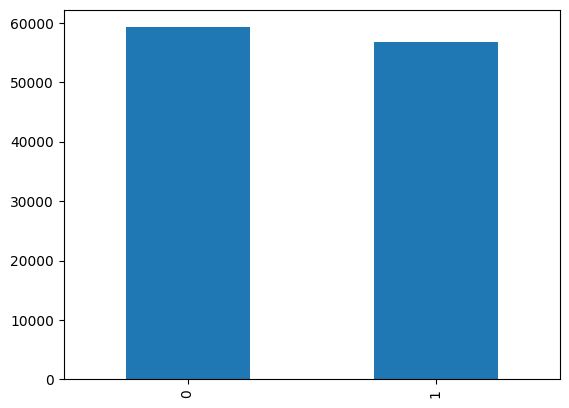

In [ ]:
df.hate.value_counts().plot(kind = 'bar')